# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset

In [3]:
df = pd.read_csv("baseball.csv")

# eda

In [4]:
df.head(4)

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101

In [5]:
df.shape # check the data dimension

(30, 17)

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.columns # check the column names for EDA

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [10]:
#No categorical data to be converted into numeric data

## handle null values

In [11]:
df.isna().sum() #check for null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

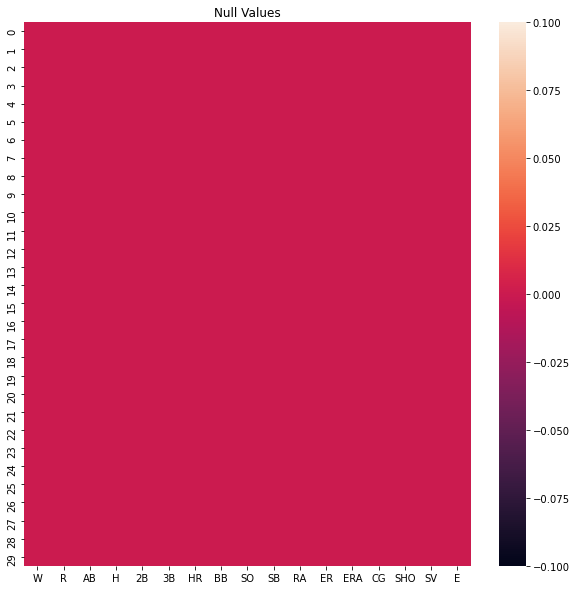

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [13]:
#No null values to be handled

In [14]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [15]:
#Checking the distribution of values of each column

W


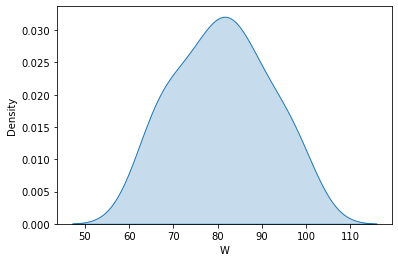

R


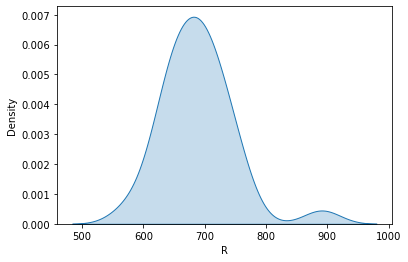

AB


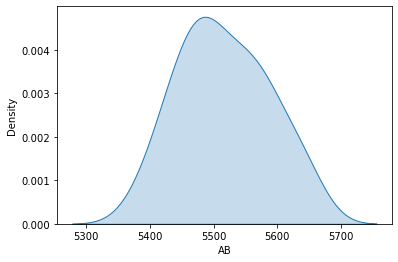

H


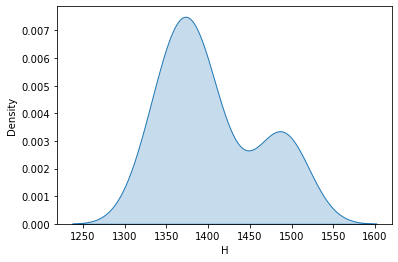

2B


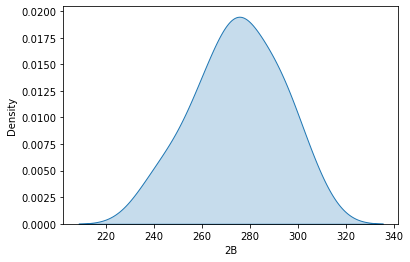

3B


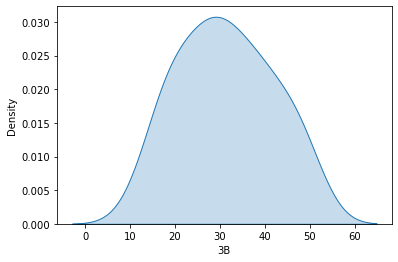

HR


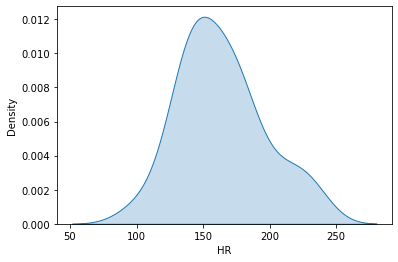

BB


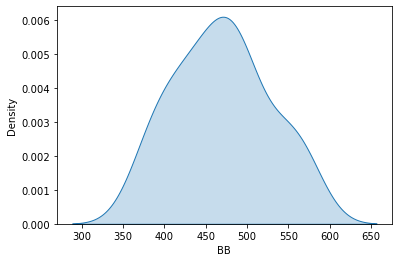

SO


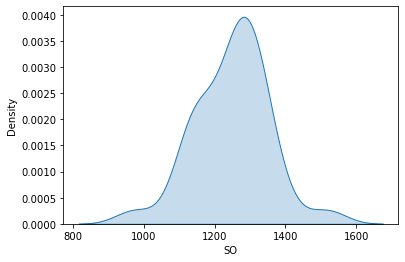

SB


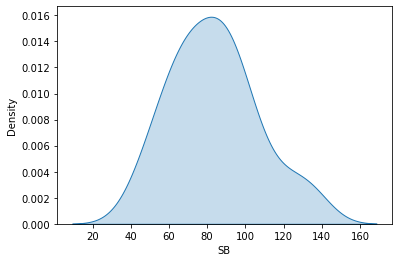

RA


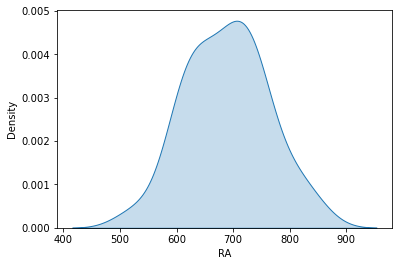

ER


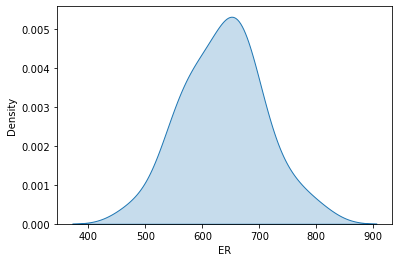

ERA


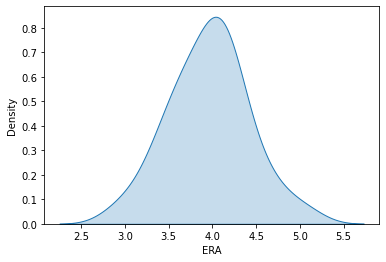

CG


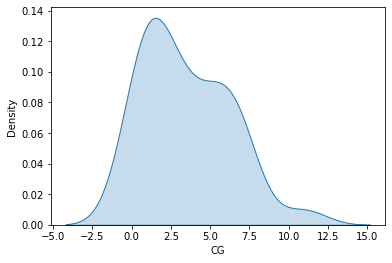

SHO


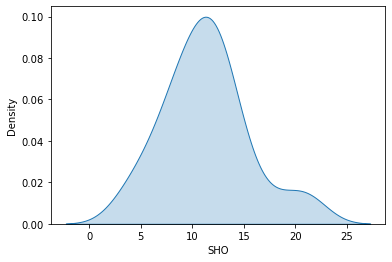

SV


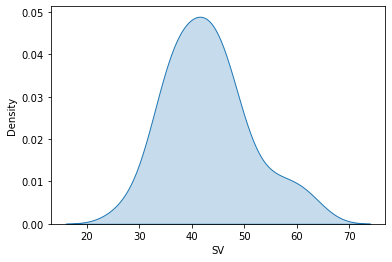

E


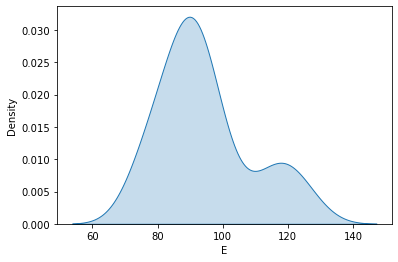

In [16]:
for col in df:
    print(col)
    
    plt.figure()
    sns.kdeplot(df[col], shade = True)
    plt.show()

In [17]:
#Checking the distribution of values of each column

W


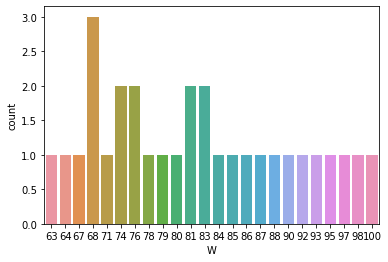

R


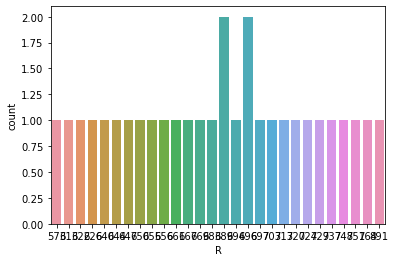

AB


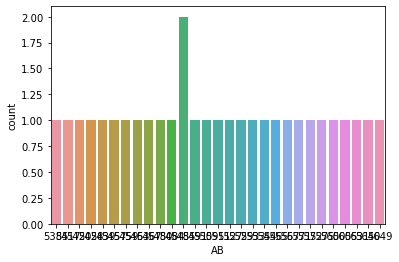

H


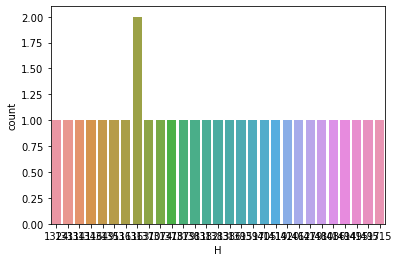

2B


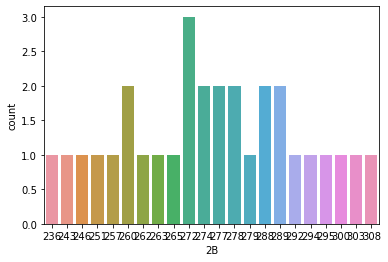

3B


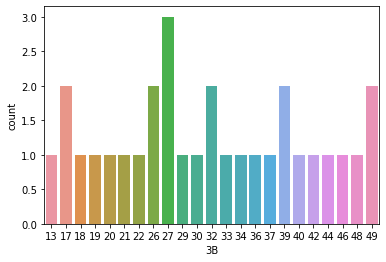

HR


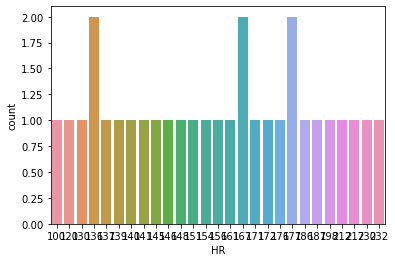

BB


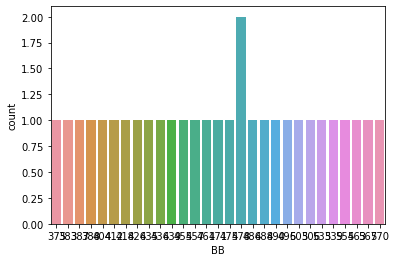

SO


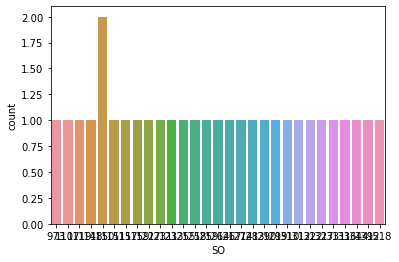

SB


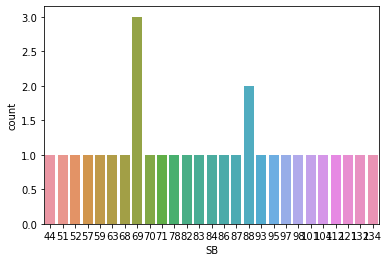

RA


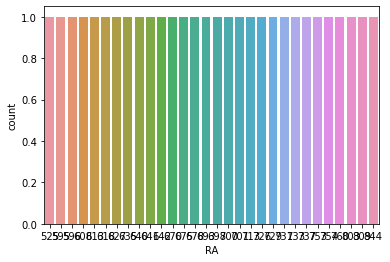

ER


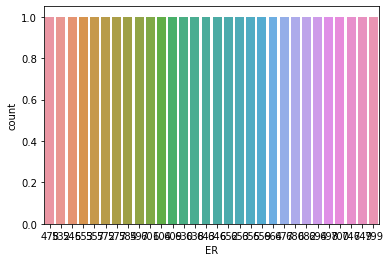

ERA


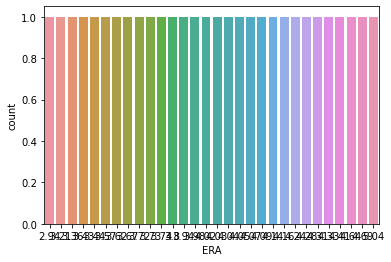

CG


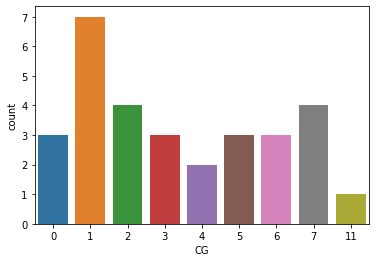

SHO


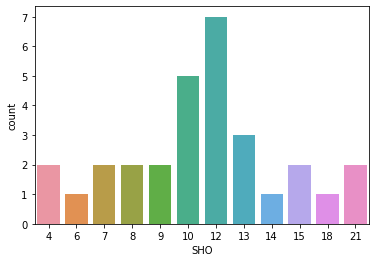

SV


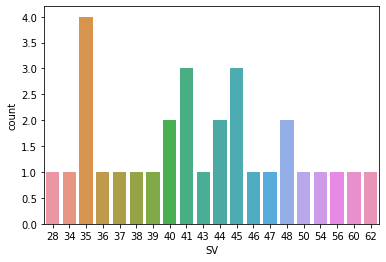

E


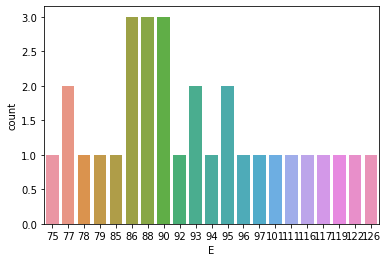

In [18]:
for col in df:
    print(col)
    
    plt.figure()
    sns.countplot(df[col])
    plt.show()

In [19]:
#target variable data is not imbalanced

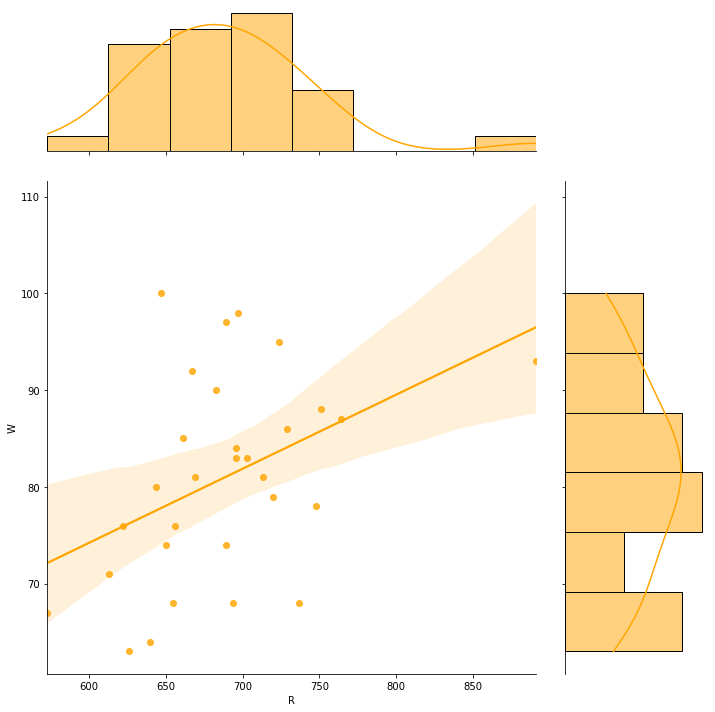

In [20]:
sns.jointplot(x="R", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [21]:
#Runs are directly proportional to wins

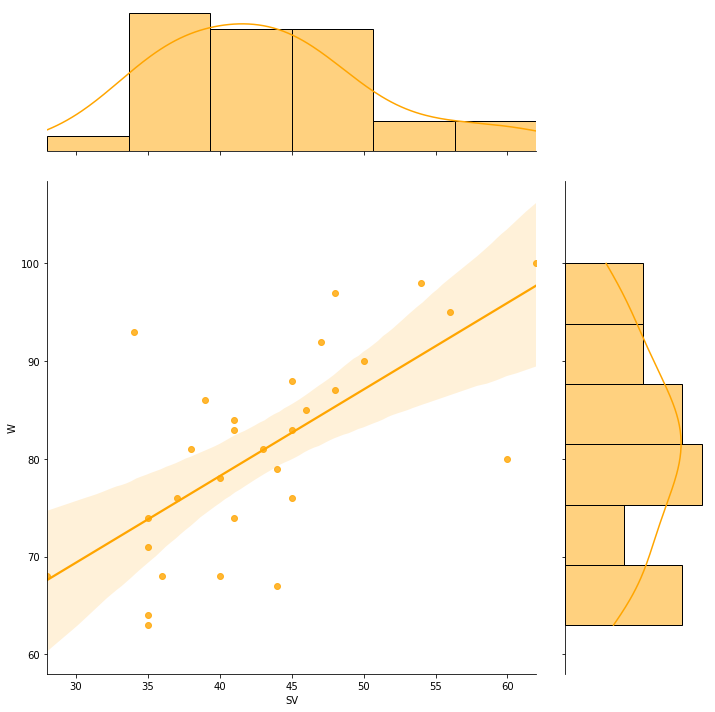

In [22]:
sns.jointplot(x="SV", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [23]:
# Saves are directly proportional to wins

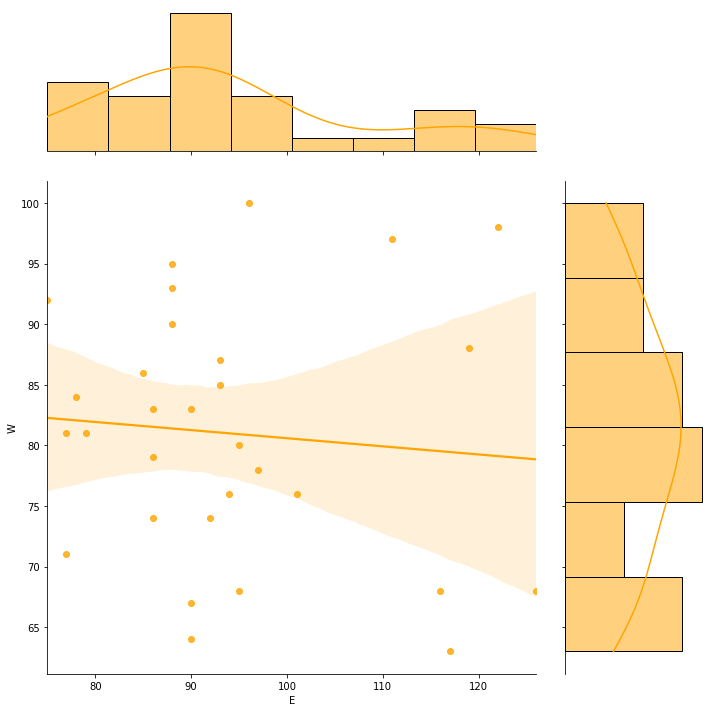

In [24]:
sns.jointplot(x="E", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [25]:
# Errors are inversely proportional to wins

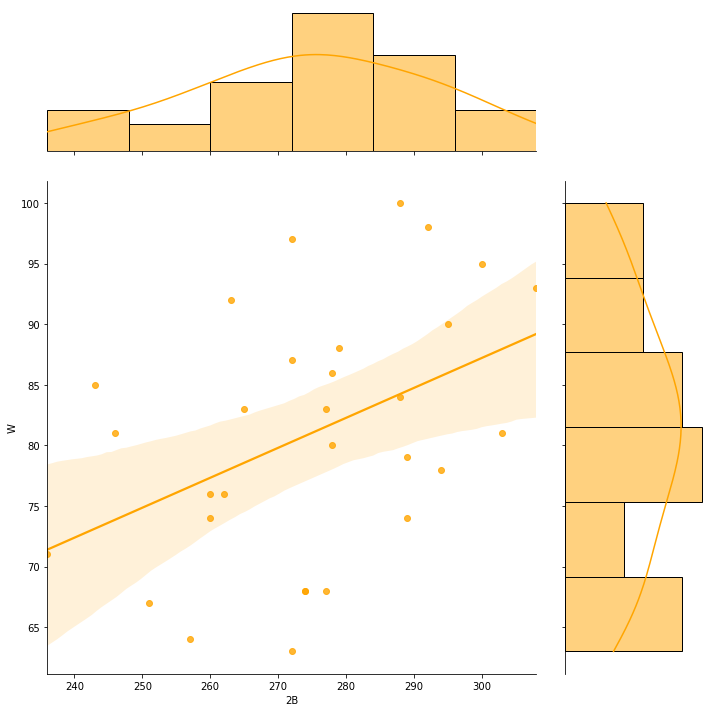

In [26]:
sns.jointplot(x="2B", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [27]:
# Doubles are directly proportional to wins

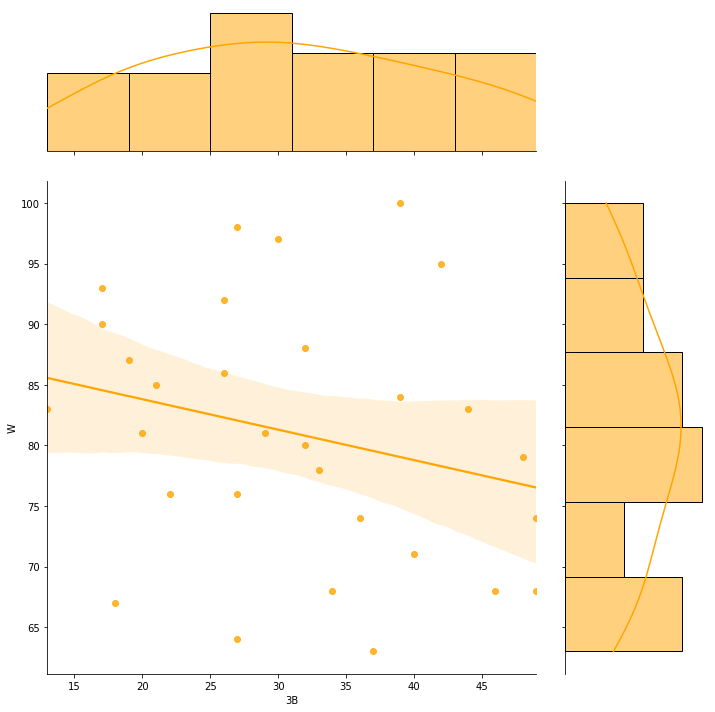

In [28]:
sns.jointplot(x="3B", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [29]:
# Triples are directly proportional to wins

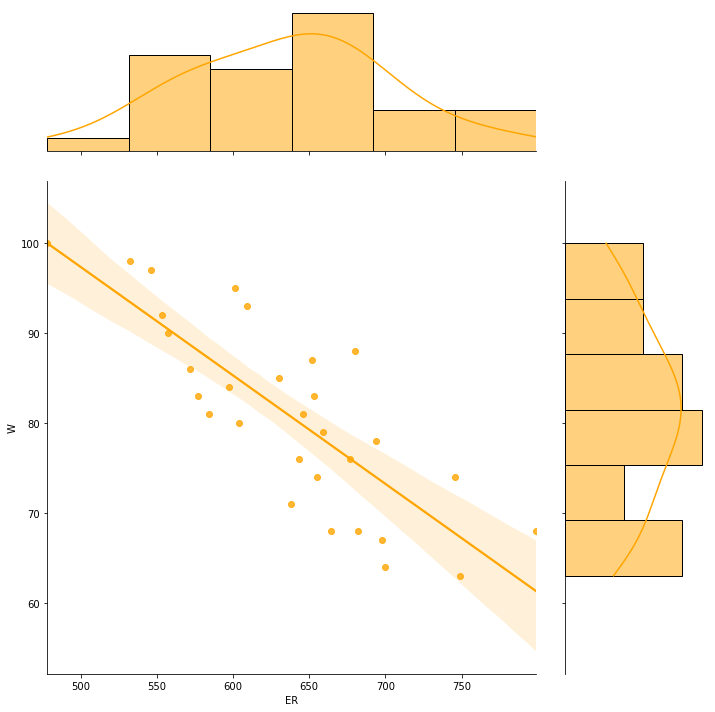

In [30]:
sns.jointplot(x="ER", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [31]:
#In baseball, an earned run is any run that was fully enabled by the offensive team's 
#production in the face of competent play from the defensive team.
#Earned runs is inversely proportional to wins

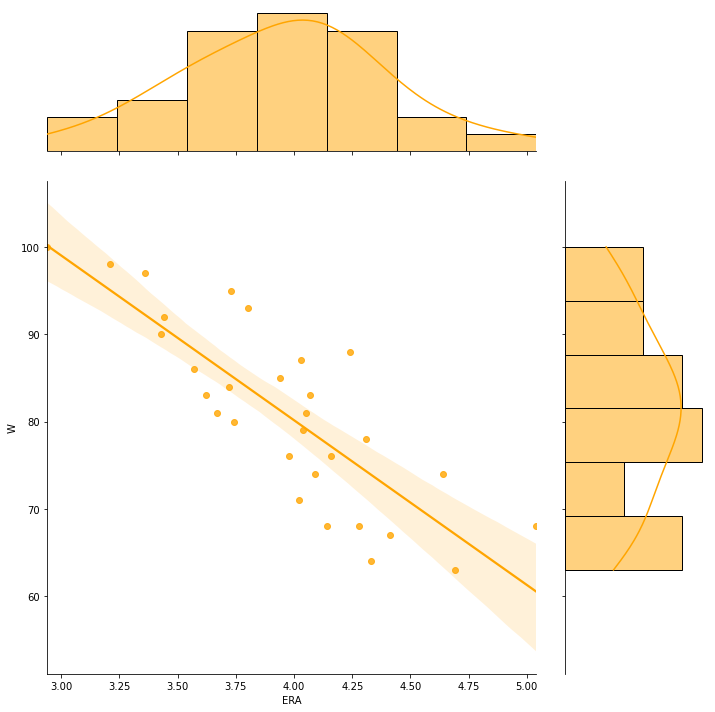

In [32]:
sns.jointplot(x="ERA", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [33]:
#Earned run average represents the number of earned runs a pitcher allows per nine innings -- 
#with earned runs being any runs that scored without the aid of an error or a passed ball. 
#ERA is the most commonly accepted statistical tool for evaluating pitchers.
#Earned runs avergae is inversely proportional to wins

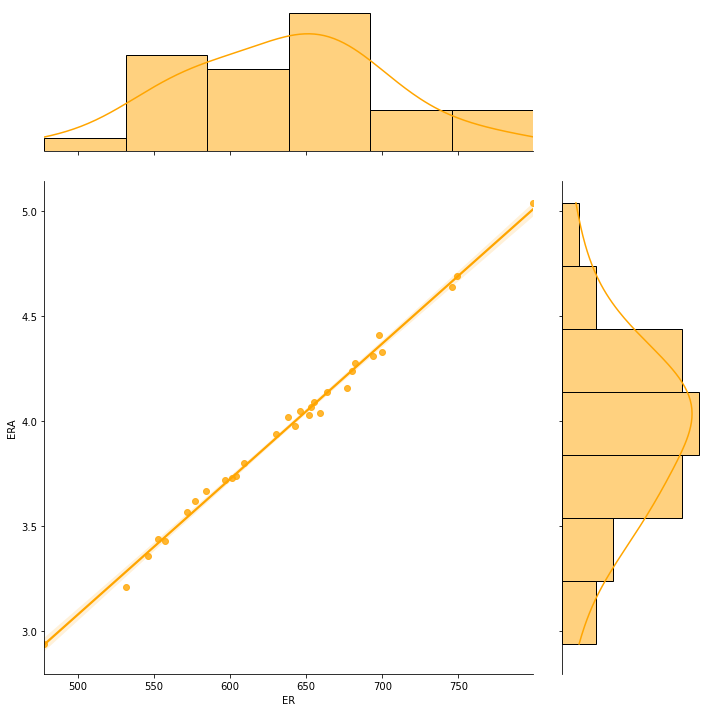

In [34]:
sns.jointplot(x="ER", y="ERA",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [35]:
#Earned runs avergae is directly proportional to earned runs

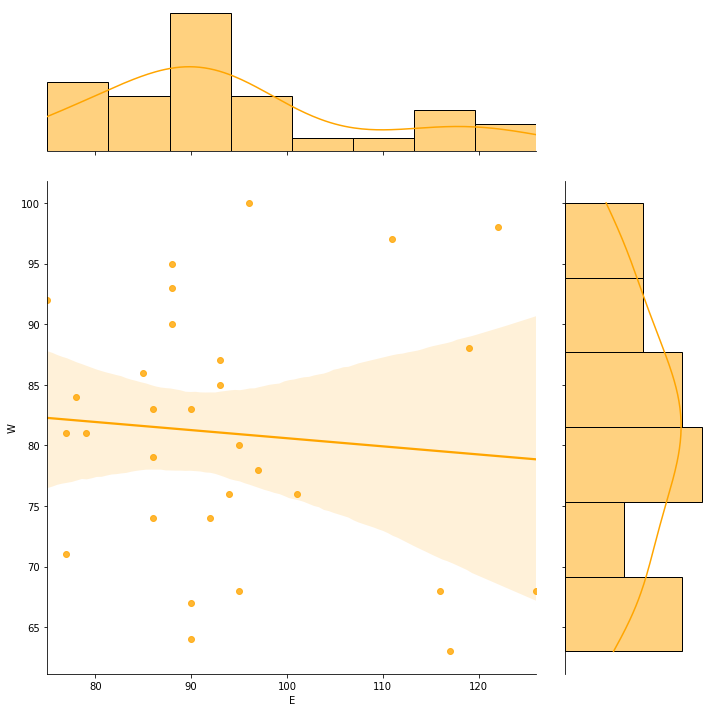

In [36]:
sns.jointplot(x="E", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

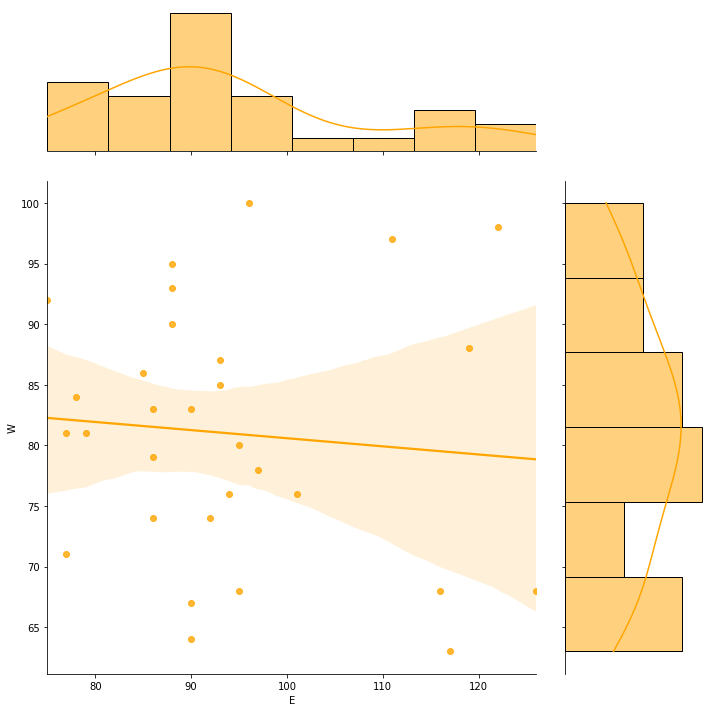

In [37]:
sns.jointplot(x="E", y="W",  data=df, height=10, ratio=3, color="orange", kind = "reg")
plt.show()

In [38]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [39]:
pre_profile = df.profile_report(title="Baseball Wins")
#pre_profile.to_file(output_file="Baseball Wins.html")

In [40]:
pre_profile

In [41]:
#Runs Allowed, Earned Runs and Earned Run Average (ERA) are highly co-related
#No missing values

## check for outliers

In [42]:
#remove outliers before skewness check and before x, y split

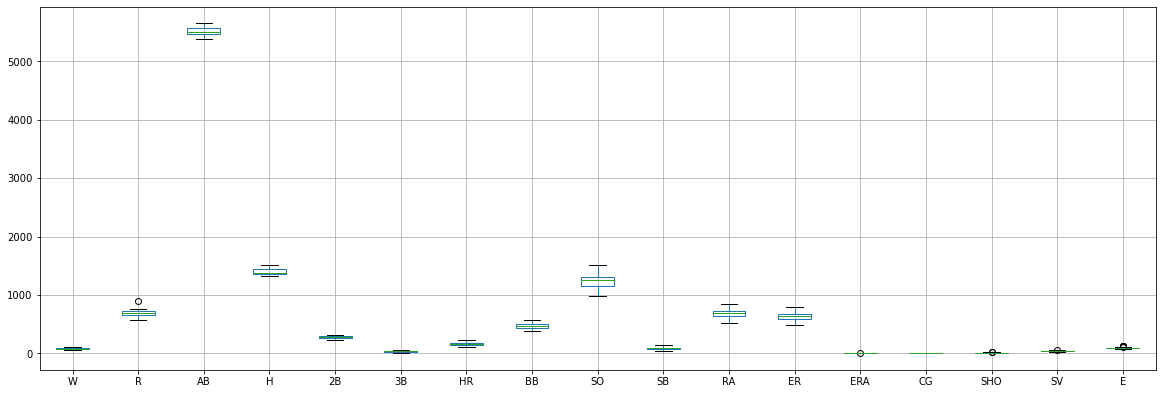

In [43]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [44]:
#Removing outliers by z score

In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [46]:
new_df.shape

(29, 17)

In [47]:
df.shape

(30, 17)

In [48]:
dataloss = ((30-29)/30)*100

In [49]:
dataloss

3.3333333333333335

In [50]:
#Outliers are not removed since available data is very less

## check co-relation

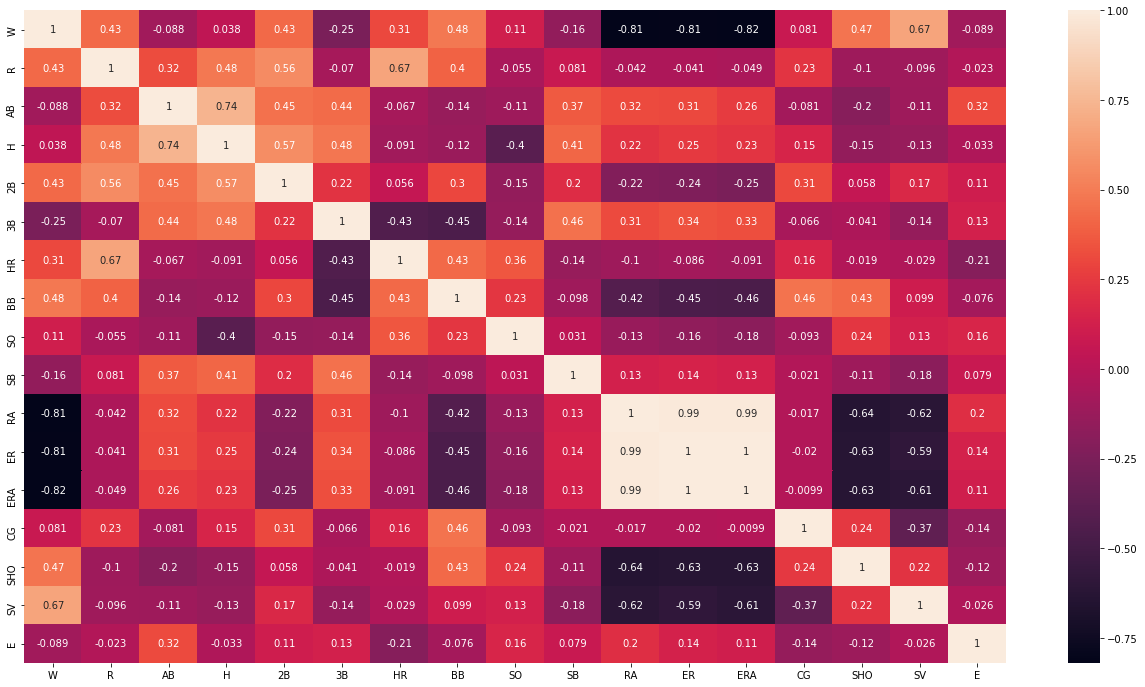

In [51]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [52]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [53]:
cor["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [54]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [55]:
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

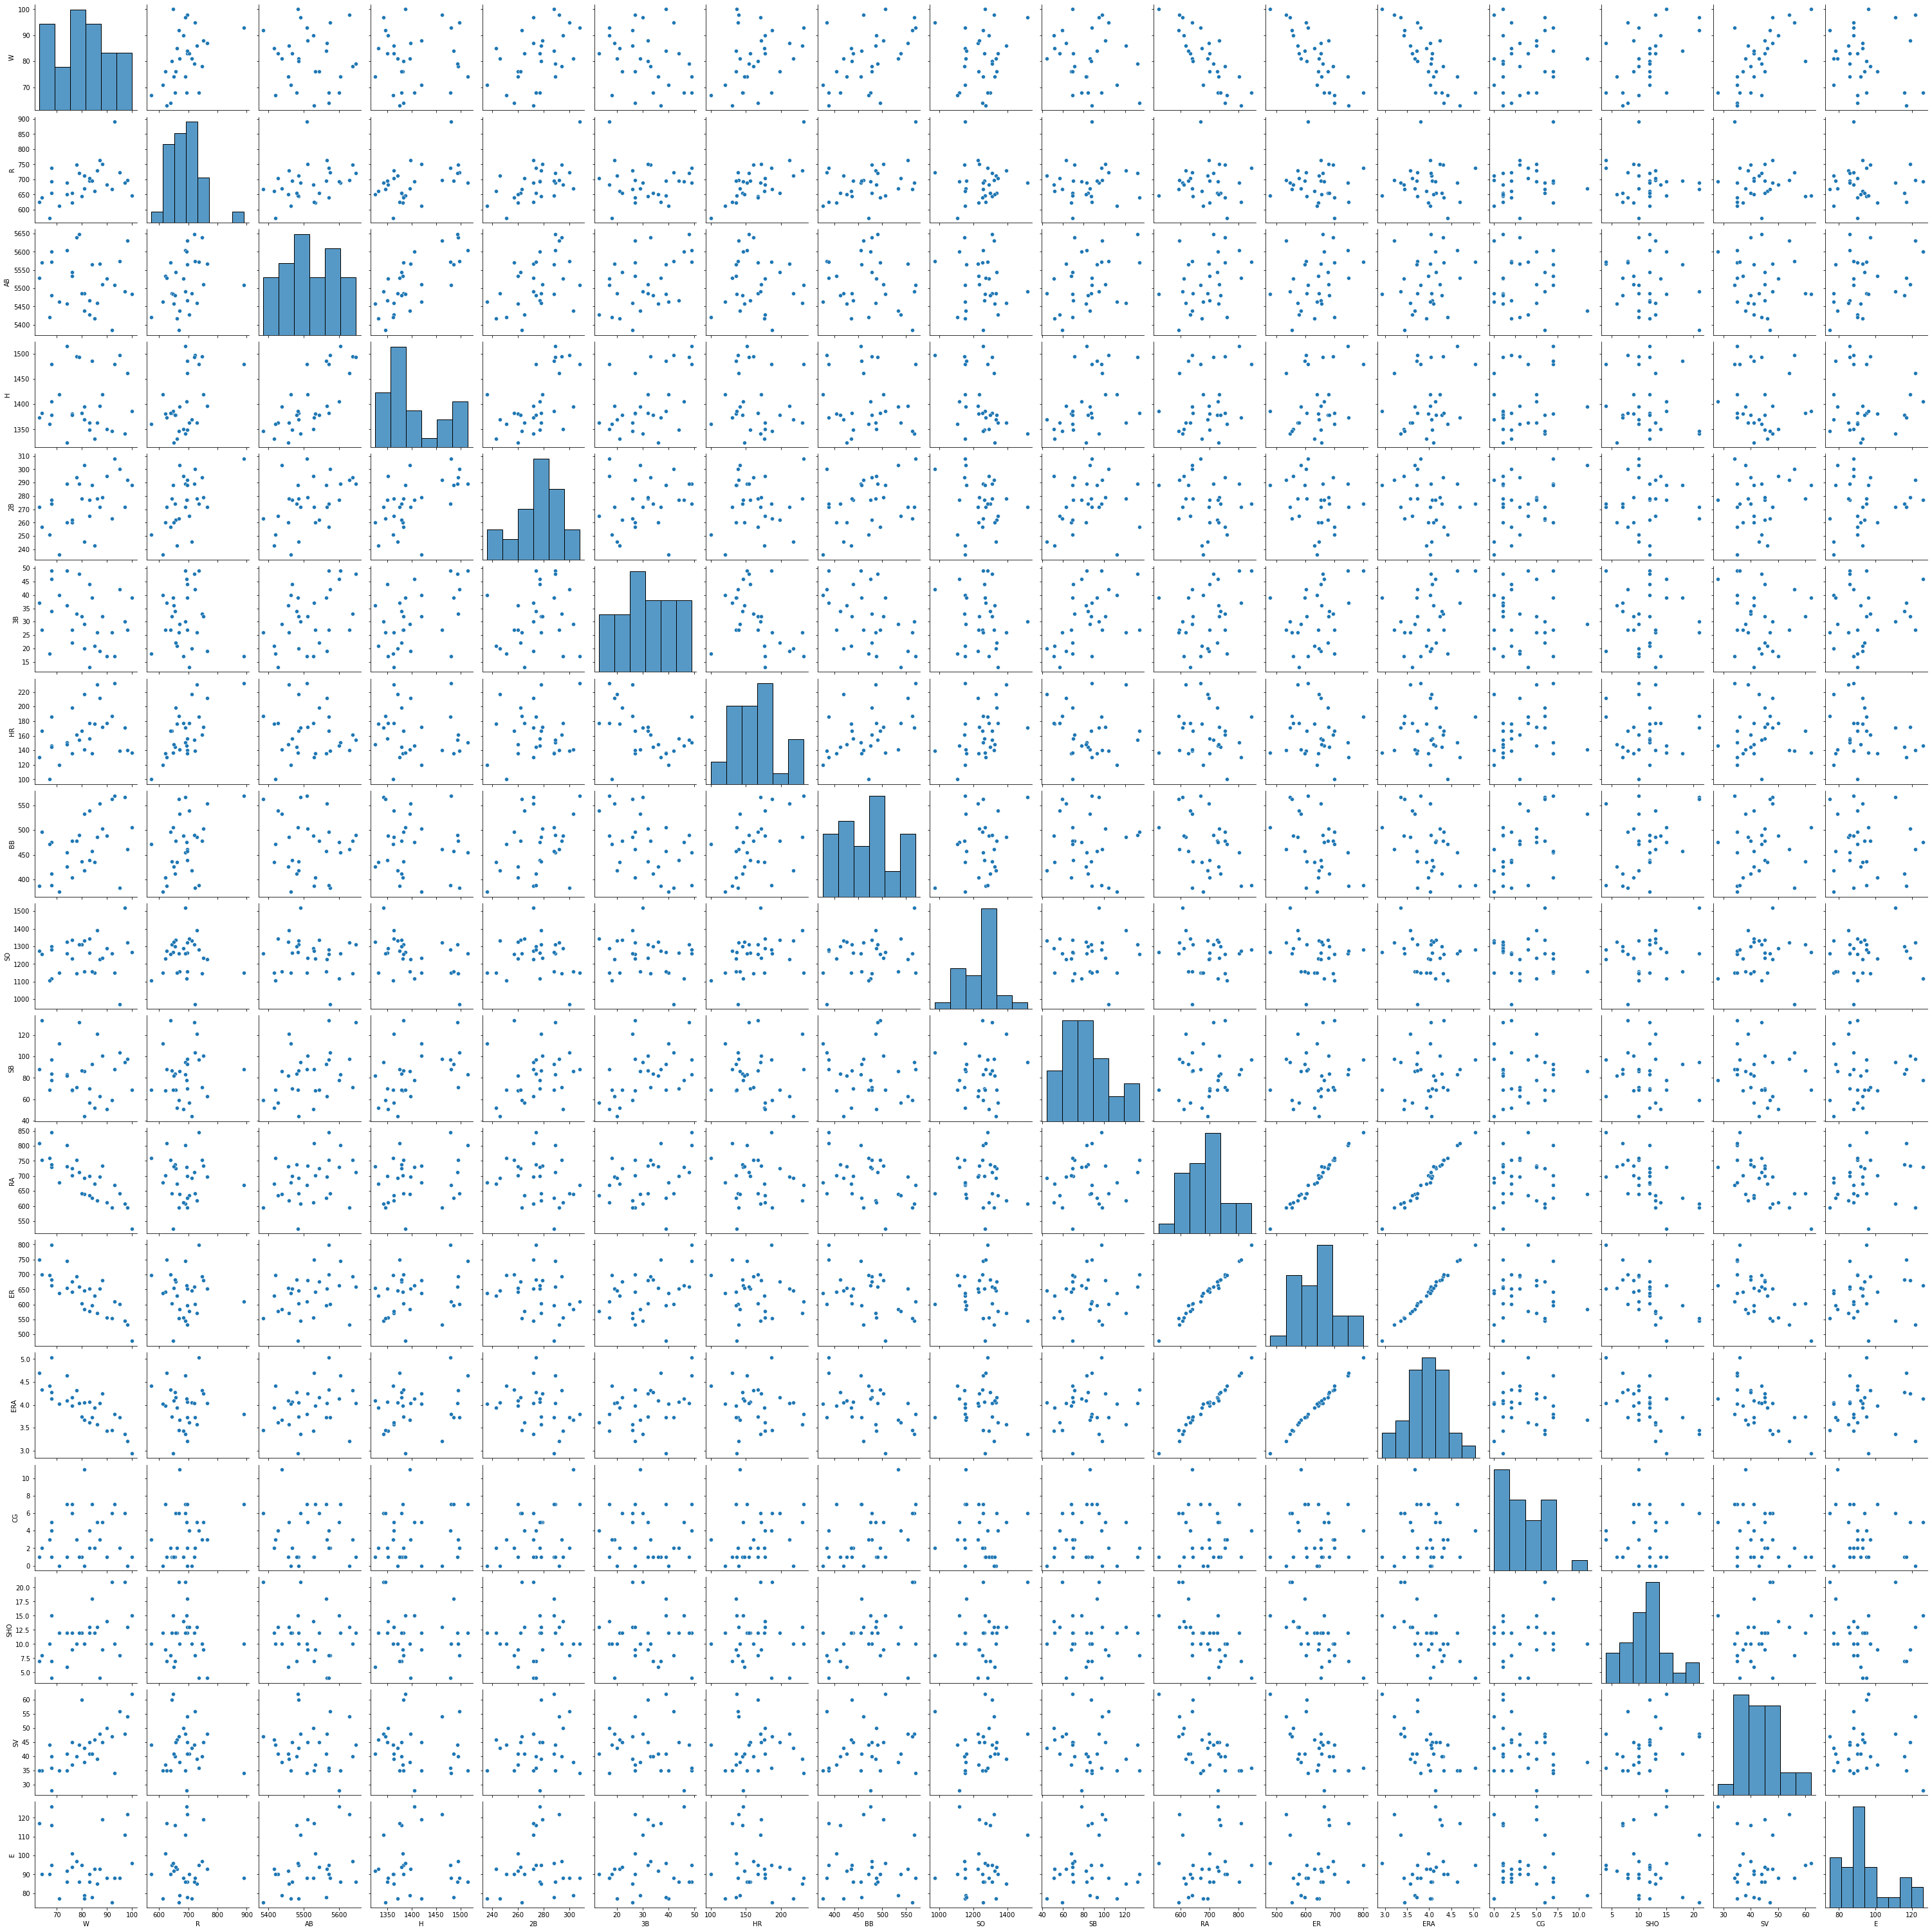

In [56]:
sns.pairplot(df[columns])

## check for skewness

In [57]:
x = df.drop('W',axis=1)
y = df['W']

W
0.04470076997798572


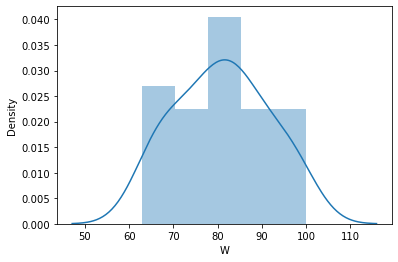

R
1.1398931660307043


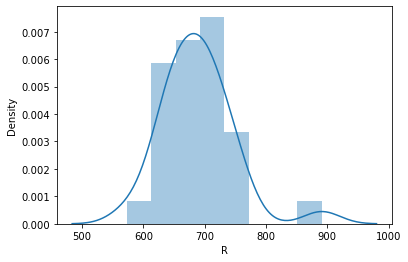

AB
0.17413429032352498


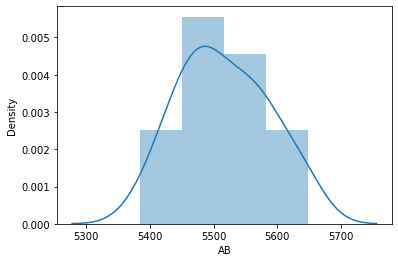

H
0.6362644174348592


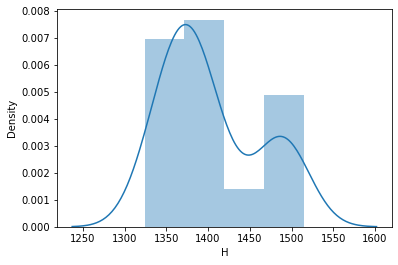

2B
-0.2189534077067715


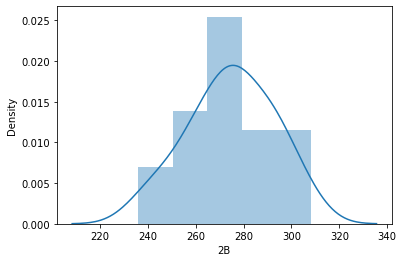

3B
0.12293523975827839


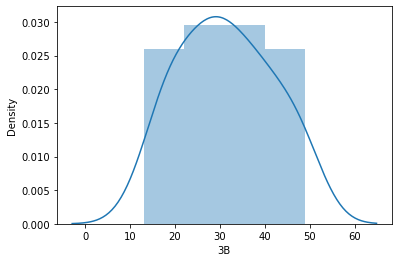

HR
0.49025146140832154


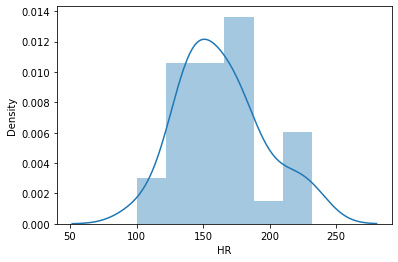

BB
0.15046085271433388


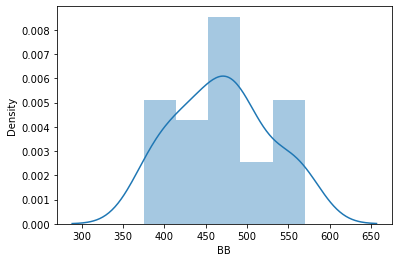

SO
-0.14815122992357777


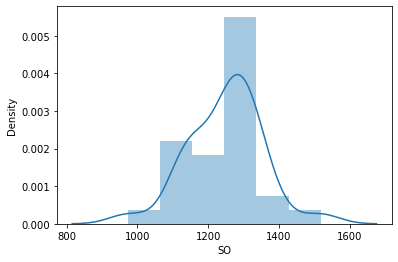

SB
0.4555569751737513


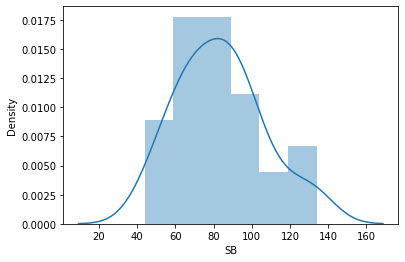

RA
0.04341475534967941


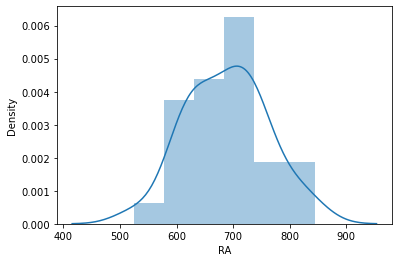

ER
0.055732557686200515


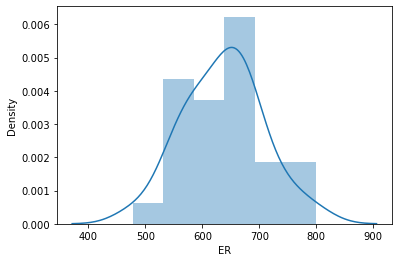

ERA
0.0506268488741678


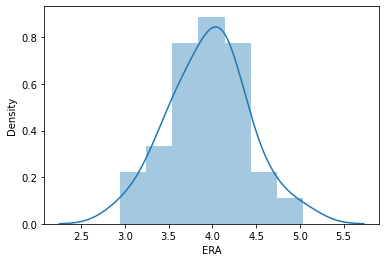

CG
0.6994790420153237


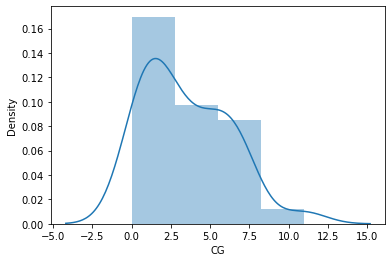

SHO
0.5370985776239573


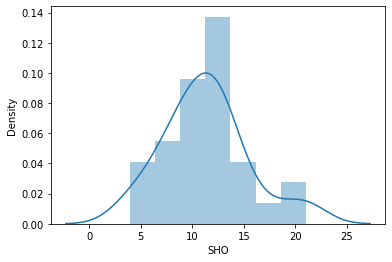

SV
0.6241798071870271


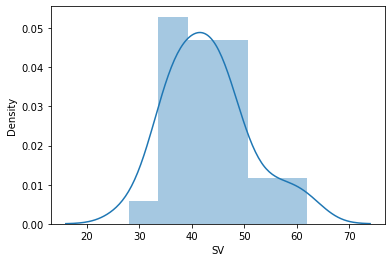

E
0.8449922672006391


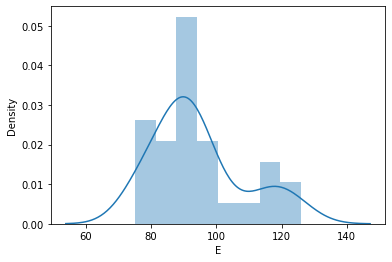

In [58]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [59]:
x.skew() # check skewness

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [60]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [61]:
df_new.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [62]:
df_new

R   AB    H        2B        3B        HR        BB        SO        SB  \
0   0.0  0.0  0.0  1.477685  1.033103 -0.764626 -1.610915 -2.569896  0.939708   
1   0.0  0.0  0.0  0.084269  1.203320 -0.158581 -0.502749  0.134913 -0.539693   
2   0.0  0.0  0.0  1.670782 -0.160270 -0.689676  1.128294 -0.901254  0.211956   
3   0.0  0.0  0.0 -0.848600 -0.360521 -0.879049 -1.181207 -0.189628 -0.642564   
4   0.0  0.0  0.0  0.792183  1.616444 -0.329850 -0.206771  0.085459  0.079629   
5   0.0  0.0  0.0  1.998506 -1.461062  1.937860  1.708067 -0.957960  0.298238   
6   0.0  0.0  0.0 -0.198558 -1.224911  1.460099  1.461121 -0.228668 -0.910154   
7   0.0  0.0  0.0 -1.556454 -1.110302  1.583551 -0.904450  0.807174 -2.102897   
8   0.0  0.0  0.0  0.141687  0.130611  0.200058 -0.559191  0.594561  0.255285   
9   0.0  0.0  0.0  1.099405  0.225256  0.007404  0.204599 -0.986257 -0.489090   
10  0.0  0.0  0.0  0.199390  0.130611  0.355503  0.634349 -0.170084  0.825451   
11  0.0  0.0  0.0  0.141687 -0.462732  1.891937  0.344014  1.434475  1.543609   
12  0.0  0.0  0.0 -1.701159 -0.997802  0.476708 -0.578074 -0.967396 -1.560880   
13  0.0  0.0  0.0 -0.743057 -0.887277  1.098636  0.204599  0.858050 -0.590846   
14  0.0  0.0  0.0  0.084269  1.370614 -0.506753  0.151842 -1.257838 -0.149220   
15  0.0  0.0  0.0  0.731608  0.771872 -0.840636  0.684777  0.164634 -0.590846   
16  0.0  0.0  0.0  0.975645 -0.360521 -0.727020 -0.097899  0.715843  0.708582   
17  0.0  0.0  0.0 -0.198558 -0.062101  0.324770  1.662186  2.774844  0.588959   
18  0.0  0.0  0.0 -0.086278  0.318822 -0.542843 -1.022149  0.483883  0.124135   
19  0.0  0.0  0.0 -1.004830 -0.360521  0.200058  0.515754  0.045967  1.963116   
20  0.0  0.0  0.0  1.161721 -1.461062  0.506589  0.378584  0.393683 -1.625038   
21  0.0  0.0  0.0 -0.582652 -1.966661  0.506589  1.224431  0.939655 -1.253362   
22  0.0  0.0  0.0 -2.029345  0.859772 -1.534280 -1.779520 -0.967396  1.232586   
23  0.0  0.0  0.0 -1.309831 -1.341775 -2.485131  0.081088 -1.369174 -0.590846   
24  0.0  0.0  0.0 -0.198558  0.593462 -1.115481 -1.527654  0.234121  0.298238   
25  0.0  0.0  0.0 -0.689868 -0.462732  0.796626  1.600712  0.075580 -1.136048   
26  0.0  0.0  0.0  0.731608  0.771872 -0.879049 -0.170355 -0.882318  0.507605   
27  0.0  0.0  0.0  0.792183  1.535156 -0.226436  0.413043  0.614735  1.900657   
28  0.0  0.0  0.0 -0.848600  0.502887 -0.435292 -0.749579  0.766543  0.034713   
29  0.0  0.0  0.0 -0.086278  1.616444  0.768314 -1.506945  0.323750  0.669021   

          RA        ER       ERA        CG       SHO        SV         E  
0  -0.660331 -0.497425 -0.500893 -0.359844 -0.789579  1.546378 -0.334953  
1   0.175465  0.257974  0.261806 -0.359844  0.251775  0.360444 -0.532211  
2  -0.674621 -0.746906 -0.636459  1.993513 -0.245393 -0.607594 -1.342331  
3   0.189512  0.113575  0.060804  1.220103 -0.510759 -0.764453  0.678524  
4   1.603228  1.582654  1.520959  1.220103  0.251775 -1.095010 -0.532211  
5  -0.247757 -0.380464 -0.343110  1.220103 -0.245393 -1.269438 -0.334953  
6   0.147360  0.243552  0.172549  0.064630 -2.099326  0.718082  0.104539  
7   0.077029  0.156937  0.217193 -1.729889 -0.245393  0.104606 -1.614550  
8  -0.646046 -0.453532 -0.478328 -0.909181  0.251775  1.905480  0.261504  
9   0.914815  0.845910  0.794823  0.064630 -0.245393 -0.309109  0.409004  
10  0.637024  0.645876  0.639800  0.716445 -0.510759  0.360444  1.577725  
11 -0.990086 -0.923801 -0.863078  0.716445  0.486160 -0.455910 -0.636014  
12 -0.176972 -0.074751 -0.028733 -0.359844  0.251775  0.482968  0.104539  
13  0.539455  0.602915  0.462190  0.981874  0.251775  0.360444  0.184254  
14  0.581292  0.416351  0.417713  0.716445  0.931345 -2.473461  1.829127  
15 -2.348646 -2.334150 -2.311585 -0.909181  0.931345  2.073674  0.336388  
16 -1.307707 -1.518396 -1.686213 -1.729889  0.486160  1.354219  1.690704  
17 -1.134186 -1.309398 -1.341812  0.981874  2.122859  0.718082  1.231063  
18  0.692697  0.674497  0.728428 -0.909181 -1.084158 -0.309109  1.455

In [63]:
x

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   13   
12  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   12   
13  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   12   
14  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   15   
15  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   15   
16  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   13   
17  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   21   
18  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1    7   
19  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2    8   
20  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   14   
21  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   13   
22  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   12   
23  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   10   
24  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1    7   
25  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   21   
26  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   18   
27  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   12   
28  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1    6   
29  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4    4   

    SV    E  
0   56   88  
1   45   86  
2   38   79  
3   37  101  
4   35   86  
5   34   88  
6   48   93  
7   43   77  
8   60   95  
9   40   97  
10  45  119  
11  39   85  
12  46   93  
13  45   94  
14  28  126  
15  62   96  
16  54  122  
17  48  111  
18  40  116  
19  35   90  
20  50   88  
21  41   90  
22  35   77  
23  44   90  
24  35  117  
25  47   75  
26  41   78  
27  44   86  
28  41   92  
29  36   95

In [64]:
x = df_new

## test train split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## regression

In [66]:
#Linear Regression

Coefficients: 
 [ 0.00000000e+00 -1.29229960e-13  4.61852778e-14 -2.88636461e+00
  5.92427778e+00  5.08898777e+00  2.92190674e+00 -4.52304548e+00
  4.35976960e-01  1.80043839e+01 -5.02267610e+01  2.56939392e+01
  6.86081228e+00 -5.59173329e-01  7.28595651e+00 -2.67159067e+00]
MAE: 13.442470270757816
MSE: 229.48366574312962
RMSE: 15.148718287139992
Variance: -0.938213425745039


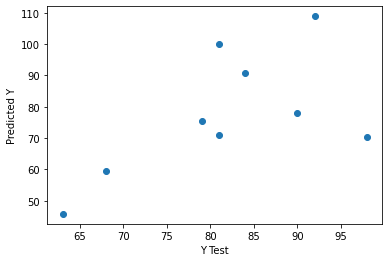

In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance:',metrics.explained_variance_score(y_test, predictions))

In [68]:
from sklearn.linear_model import Lasso, Ridge

In [69]:
#alpha values could be .00001, .0001, 0.01,.1,1,10, higher values reduce all coefficients towards 0 and impact output
# default value of alpha is 0.01
ls = Lasso(alpha=0.00001)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.9204179145419862

In [70]:
ls.coef_

array([  0.        ,   0.        ,   0.        ,  -2.61223514,
         5.69046636,   4.77459301,   2.90729915,  -4.27563885,
         0.3420902 ,  15.30946992, -45.6590949 ,  23.71614599,
         6.68687309,  -0.65532105,   6.95299505,  -2.52382615])

In [71]:
rd=Ridge(alpha=0.00001)
rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.9208048810481414

In [72]:
rd.coef_

array([  0.        ,   0.        ,   0.        ,  -2.88536087,
         5.92333929,   5.08786548,   2.9217125 ,  -4.52219187,
         0.43564564,  17.99580277, -50.20541582,  25.68073607,
         6.86003901,  -0.5594641 ,   7.28469582,  -2.67117302])

In [73]:
#ElasticNet
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha= 0.00001)
enr.fit(x_train, y_train)
enr.score(x_train, y_train)

0.9203983964648044

In [74]:
enr.coef_

array([  0.        ,   0.        ,   0.        ,  -2.60637378,
         5.68473979,   4.76806954,   2.90577403,  -4.2707919 ,
         0.34018149,  15.26272135, -45.51933932,  23.62034685,
         6.68195863,  -0.65688149,   6.94545126,  -2.52176405])

In [75]:
#CatBoostRegressor

0:	learn: 8.6637670	total: 143ms	remaining: 1.29s
1:	learn: 7.4880469	total: 145ms	remaining: 578ms
2:	learn: 6.5982445	total: 146ms	remaining: 340ms
3:	learn: 6.0489688	total: 147ms	remaining: 220ms
4:	learn: 5.4057820	total: 148ms	remaining: 148ms
5:	learn: 4.8984905	total: 149ms	remaining: 99.4ms
6:	learn: 4.4999482	total: 150ms	remaining: 64.4ms
7:	learn: 4.0199486	total: 151ms	remaining: 37.9ms
8:	learn: 3.6102155	total: 153ms	remaining: 17ms
9:	learn: 3.1887303	total: 154ms	remaining: 0us
MAE: 3.776307230350974
MSE: 20.08346850958128
RMSE: 4.481458301667135
Variance: 0.8549898582306729


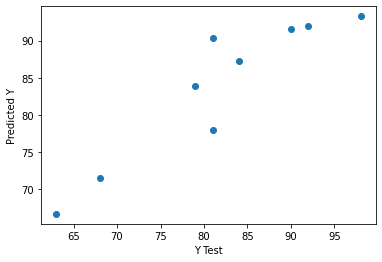

In [76]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [77]:
#decisiontreeregressor

MAE: 6.722222222222222
MSE: 61.25
RMSE: 7.826237921249264
Variance: 0.4911474675033616


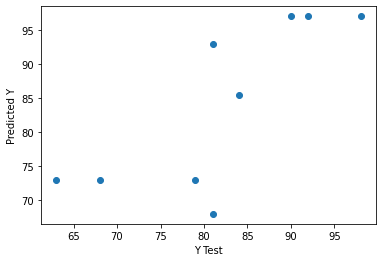

In [78]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

## hyper parameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 2, 'min_samples_split': 10}
85.14518963372386


In [80]:
new_model = DecisionTreeRegressor(max_depth=2,
                                  min_samples_split=10)
#or new_model = gs.best_estimator_
new_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=10)

## saving the model

In [81]:
import joblib
joblib.dump(new_model, "model.pkl") #rename as per project name
prediction = new_model.predict(x_test)